In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler


In [7]:
fluxes = pd.read_csv("flux_3labels_JD")

In [8]:
fluxes

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,992,993,994,995,996,997,998,999,Labels,Labels_1
0,0,-77.226931,-17.455800,18.893241,15.820182,-9.982734,15.043798,4.179589,-17.948554,-2.606717,...,0.028272,-1.012767,0.186138,0.166001,1.284391,0.068284,0.371941,0.902037,no flare,no flare
1,1,-152.609354,-37.555708,-46.712326,11.335045,0.584405,8.266733,-0.834839,1.118031,2.682780,...,-0.200902,0.648628,-0.158028,-0.274293,1.317403,-1.911651,0.005103,-0.326359,no flare,no flare
2,2,-137.820947,-7.456546,-36.848851,2.369756,-3.514909,14.162960,4.620202,-1.609684,-0.721766,...,0.455582,1.034672,-0.596952,0.462513,-0.773176,-1.352247,0.587637,0.810433,no flare,no flare
3,3,-159.809543,-34.025970,-32.196320,1.168193,-1.194769,11.980240,3.178410,-2.911753,-0.323603,...,-0.970405,-0.920185,0.221509,0.093836,0.542105,-1.106048,0.877086,0.689458,no flare,no flare
4,4,-150.763019,-35.511307,-47.121941,10.237884,1.104875,7.392145,-0.367977,1.931578,3.407632,...,1.020580,0.191762,-0.744943,-0.993822,0.657094,-0.539081,-0.928584,-1.171663,no flare,no flare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,28410,66.250195,50.639520,81.550675,30.381838,2.992594,13.370503,6.323793,-6.035832,11.768254,...,-1.240908,0.479000,-1.048366,1.941936,-0.988622,-1.026125,0.372124,1.261229,no flare,no flare
28411,28411,-38.593233,14.109218,32.758031,1.911352,4.727023,3.886029,-1.979894,21.747084,6.563772,...,0.326658,1.685865,0.979851,1.316266,-0.418129,0.786073,-1.645505,-0.586321,no flare,no flare
28412,28412,-72.964957,-13.696635,18.159553,-1.407163,4.126969,3.115778,-11.960450,26.443290,6.974761,...,2.962566,0.880726,-0.709951,-0.070151,-0.623401,0.585996,-1.469852,-0.331505,strong flare end,strong flare
28413,28413,-37.213492,2.720945,28.399811,8.287974,2.157047,1.111266,-3.276166,23.269013,5.202598,...,0.618731,0.545907,0.446041,-0.480131,-0.120338,0.307843,-0.745497,-0.663347,no flare,no flare


In [9]:
X, y = make_imbalance(fluxes.drop(['Labels','Labels_1'],axis=1), fluxes['Labels_1'], sampling_strategy={"no flare":467, "weak flare":467, "strong flare":467})

In [5]:
# Initialize variables to store confusion matrices for each model
rf_confusion_sum = np.zeros((3, 3))
sgd_confusion_sum = np.zeros((3, 3))
svc_confusion_sum = np.zeros((3, 3))

Average Categorical Accuracy: 0.45


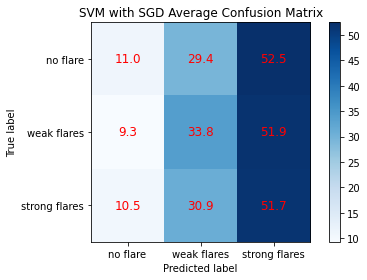

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

# Define the labels
labels = ["no flare", "weak flares", "strong flares"]

# Initialize variables to store confusion matrices for each trial
sgd_confusion_sum = np.zeros((3, 3))

# Number of trials
num_trials = 10

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # SGD Classifier
    sgd_classifier = SGDClassifier(loss='hinge', random_state=42)
    sgd_classifier.fit(X_train, y_train)
    sgd_predictions = sgd_classifier.predict(X_test)
    
    # Calculate confusion matrix for each trial
    sgd_confusion = confusion_matrix(y_test, sgd_predictions)

    # Sum the confusion matrices over trials
    sgd_confusion_sum += sgd_confusion
    
    # Calculate accuracy score for each trial
    accuracy = accuracy_score(y_test, svc_predictions)
    accuracy_scores.append(accuracy)

# Average confusion matrices over trials
sgd_average_confusion = sgd_confusion_sum / num_trials

# Average accuracy score over trials
average_accuracy = np.mean(accuracy_scores)

# Print the average accuracy score
print(f'Average Categorical Accuracy: {average_accuracy:.2f}')

# Plot the average confusion matrix with annotations
plt.imshow(sgd_average_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Annotate each entry with its value and secondary labels
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{sgd_average_confusion[i, j]}", ha='center', va='center', color='red', fontsize=12)

plt.title('SVM with SGD Average Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.tight_layout()
plt.savefig('AvgMatrices_SGD.png', dpi=300)
plt.show()


Average Categorical Accuracy: 0.43


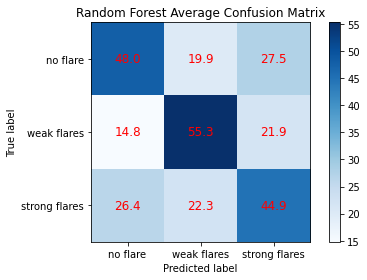

In [41]:
# Define the labels
labels = ["no flare", "weak flares", "strong flares"]

# Initialize variables to store confusion matrices for each trial
rf_confusion_sum = np.zeros((3, 3))

# Number of trials
num_trials = 10

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    rf_predictions = rf_classifier.predict(X_test)

    # Calculate confusion matrix for each trial
    rf_confusion = confusion_matrix(y_test, rf_predictions)

    # Sum the confusion matrices over trials
    rf_confusion_sum += rf_confusion
    
    # Calculate accuracy score for each trial
    accuracy = accuracy_score(y_test, svc_predictions)
    accuracy_scores.append(accuracy)

# Average confusion matrices over trials
rf_average_confusion = rf_confusion_sum / num_trials


# Average accuracy score over trials
average_accuracy = np.mean(accuracy_scores)

# Print the average accuracy score
print(f'Average Categorical Accuracy: {average_accuracy:.2f}')

# Plot the average confusion matrix with annotations
plt.imshow(rf_average_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Annotate each entry with its value and secondary labels
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{rf_average_confusion[i, j]}", ha='center', va='center', color='red', fontsize=12)

plt.title('Random Forest Average Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.tight_layout()
plt.savefig('AvgMatrices_RF.png', dpi=300)
plt.show()


Average Categorical Accuracy: 0.50


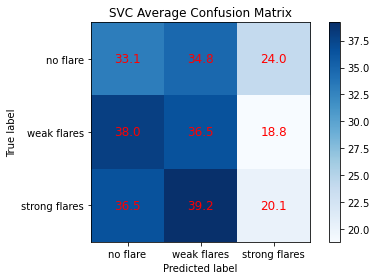

In [39]:
# Define the labels
labels = ["no flare", "weak flares", "strong flares"]

# Initialize variables to store confusion matrices for each trial
svc_confusion_sum = np.zeros((3, 3))

# Number of trials
num_trials = 10

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(kernel='poly', degree=2, C=10)
    svc_classifier.fit(X_train, y_train)
    svc_predictions = svc_classifier.predict(X_test)

    # Calculate confusion matrix for each trial
    svc_confusion = confusion_matrix(y_test, svc_predictions)

    # Sum the confusion matrices over trials
    svc_confusion_sum += svc_confusion
    
    # Calculate accuracy score for each trial
    accuracy = accuracy_score(y_test, svc_predictions)
    accuracy_scores.append(accuracy)

# Average confusion matrices over trials
svc_average_confusion = svc_confusion_sum / num_trials

# Average accuracy score over trials
average_accuracy = np.mean(accuracy_scores)

# Print the average accuracy score
print(f'Average Categorical Accuracy: {average_accuracy:.2f}')

# Plot the average confusion matrix with annotations
plt.imshow(svc_average_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Annotate each entry with its value and secondary labels
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{svc_average_confusion[i, j]}", ha='center', va='center', color='red', fontsize=12)

plt.title('SVC Average Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.tight_layout()
plt.savefig('AvgMatrix_SVC_Poly.png', dpi=300)
plt.show()



Average Categorical Accuracy: 0.68


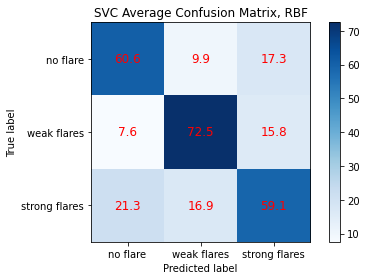

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the labels
labels = ["no flare", "weak flares", "strong flares"]

# Initialize variables to store confusion matrices and accuracy scores for each trial
svc_confusion_sum = np.zeros((3, 3))
accuracy_scores = []

# Number of trials
num_trials = 10

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(C=10.0,kernel = 'rbf',gamma=0.0001)
    svc_classifier.fit(X_train, y_train)
    svc_predictions = svc_classifier.predict(X_test)

    # Calculate confusion matrix for each trial
    svc_confusion = confusion_matrix(y_test, svc_predictions)

    # Sum the confusion matrices over trials
    svc_confusion_sum += svc_confusion

    # Calculate accuracy score for each trial
    accuracy = accuracy_score(y_test, svc_predictions)
    accuracy_scores.append(accuracy)

# Average confusion matrices over trials
svc_average_confusion = svc_confusion_sum / num_trials

# Average accuracy score over trials
average_accuracy = np.mean(accuracy_scores)

# Print the average accuracy score
print(f'Average Categorical Accuracy: {average_accuracy:.2f}')

# Plot the average confusion matrix with annotations
plt.imshow(svc_average_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Annotate each entry with its value and secondary labels
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{svc_average_confusion[i, j]}", ha='center', va='center', color='red', fontsize=12)

plt.title('SVC Average Confusion Matrix, RBF')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.tight_layout()
plt.savefig('AvgMatrix_SVC_rbf.png', dpi=300)
plt.show()


## Generating the Categorical Accuracy scores

In [7]:
# Define the labels
labels = ["no flare", "weak flares", "strong flares"]

# Initialize variables to store confusion matrices and accuracy scores for each trial
svc_confusion_sum = np.zeros((3, 3))
class_correct_predictions = np.zeros(3)
class_total_instances = np.zeros(3)

# Number of trials
num_trials = 10

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(C=10.0, kernel='rbf', gamma=0.0001)
    svc_classifier.fit(X_train, y_train)
    svc_predictions = svc_classifier.predict(X_test)

    # Calculate confusion matrix for each trial
    svc_confusion = confusion_matrix(y_test, svc_predictions)

    # Sum the confusion matrices over trials
    svc_confusion_sum += svc_confusion

    # Calculate accuracy for each class and update counts
    for i in range(3):
        class_correct_predictions[i] += svc_confusion[i, i]
        class_total_instances[i] += np.sum(svc_confusion[i, :])

# Average confusion matrices over trials
svc_average_confusion = svc_confusion_sum / num_trials

# Calculate and print the average accuracy for each class
for i, label in enumerate(labels):
    accuracy = class_correct_predictions[i] / class_total_instances[i]
    print(f'Average Accuracy for {label}: {accuracy:.2f}')

# Print the average accuracy score across all classes
average_accuracy = np.mean(accuracy_scores)
print(f'Average Categorical Accuracy: {average_accuracy:.2f}')

# Rest of your code for plotting the confusion matrix


Average Accuracy for no flare: 0.64
Average Accuracy for weak flares: 0.77
Average Accuracy for strong flares: 0.56


NameError: name 'accuracy_scores' is not defined

In [ ]:
svc_classifier = SVC(C=10.0,kernel = 'rbf',gamma=0.0001)

# Convergence

Trial 1/100 - Accuracy: 0.31
Trial 2/100 - Accuracy: 0.32
Trial 3/100 - Accuracy: 0.32
Trial 4/100 - Accuracy: 0.28
Trial 5/100 - Accuracy: 0.33
Trial 6/100 - Accuracy: 0.31
Trial 7/100 - Accuracy: 0.33
Trial 8/100 - Accuracy: 0.31
Trial 9/100 - Accuracy: 0.29
Trial 10/100 - Accuracy: 0.32
Trial 11/100 - Accuracy: 0.32
Trial 12/100 - Accuracy: 0.36
Trial 13/100 - Accuracy: 0.32
Trial 14/100 - Accuracy: 0.33
Trial 15/100 - Accuracy: 0.29
Trial 16/100 - Accuracy: 0.28
Trial 17/100 - Accuracy: 0.27
Trial 18/100 - Accuracy: 0.31
Trial 19/100 - Accuracy: 0.36
Trial 20/100 - Accuracy: 0.32
Trial 21/100 - Accuracy: 0.32
Trial 22/100 - Accuracy: 0.30
Trial 23/100 - Accuracy: 0.30
Trial 24/100 - Accuracy: 0.32
Trial 25/100 - Accuracy: 0.37
Trial 26/100 - Accuracy: 0.30
Trial 27/100 - Accuracy: 0.32
Trial 28/100 - Accuracy: 0.31
Trial 29/100 - Accuracy: 0.28
Trial 30/100 - Accuracy: 0.34
Trial 31/100 - Accuracy: 0.33
Trial 32/100 - Accuracy: 0.32
Trial 33/100 - Accuracy: 0.31
Trial 34/100 - Accu

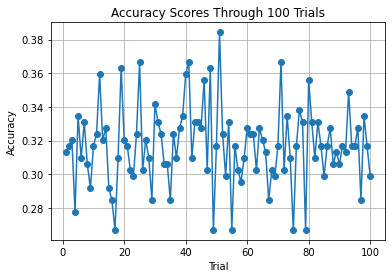

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables to store accuracy scores for each trial
accuracy_scores = []

# Number of trials
num_trials = 100

for trial in range(1, num_trials + 1):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(kernel='poly', degree=2, C=1.0, random_state=42)
    svc_classifier.fit(X_train, y_train)
    svc_predictions = svc_classifier.predict(X_test)

    # Calculate accuracy score for each trial
    accuracy = accuracy_score(y_test, svc_predictions)
    accuracy_scores.append(accuracy)

    # Print progress
    print(f'Trial {trial}/{num_trials} - Accuracy: {accuracy:.2f}')

# Plot the accuracy scores through all trials
plt.plot(range(1, num_trials + 1), accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy Scores Through 100 Trials')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables to store average accuracy scores for each number of trials
num_trials_list = [5, 10, 50, 100, 150, 200, 250, 500]
average_accuracy_scores = []

# Number of trials for each number of trials
num_total_trials = 500

for num_trials in num_trials_list:
    # Initialize variables to store accuracy scores for each trial
    accuracy_scores = []

    for trial in range(1, num_total_trials + 1):
        # Split the data into training and testing sets with different random states
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

        # Support Vector Classifier (SVC)
        svc_classifier = SVC(kernel='poly', degree=2, C=1.0, random_state=42)
        svc_classifier.fit(X_train, y_train)
        svc_predictions = svc_classifier.predict(X_test)

        # Calculate accuracy score for each trial
        accuracy = accuracy_score(y_test, svc_predictions)
        accuracy_scores.append(accuracy)

    # Calculate average accuracy score over the specified number of trials
    average_accuracy = np.mean(accuracy_scores)
    average_accuracy_scores.append(average_accuracy)

# Plot the average accuracy scores
plt.plot(num_trials_list, average_accuracy_scores, marker='o', linestyle='-')
plt.title('Average Accuracy Scores Convergence')
plt.xlabel('Number of Trials')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

# Categorical Precision and Recall and F1 Score

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [18]:
# Number of trials
num_trials = 10



## Random Forest

In [25]:
precisions = []
recalls = []
f1_scores = []

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    rf_predictions = rf_classifier.predict(X_test)
    
    # Calculate precision, recall, and f1 score for each trial
    precisions.append(precision_score(y_test, rf_predictions, average="macro"))
    recalls.append(recall_score(y_test, rf_predictions, average="macro"))
    f1_scores.append(f1_score(y_test, rf_predictions, average="macro"))


In [26]:
rf_avg_precision = sum(precisions) / len(precisions)
rf_avg_recalls = sum(recalls)/ len(recalls)
rf_avg_f1_scores = sum(f1_scores)/len(f1_scores)

In [27]:
rf_avg_precision

0.5267588282663371

In [28]:
rf_avg_recalls

0.5261426295515519

In [29]:
rf_avg_f1_scores

0.5230985829310205

## stochastic gradient descent

In [30]:
precisions = []
recalls = []
f1_scores = []

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # SGD Classifier
    sgd_classifier = SGDClassifier(loss='hinge', random_state=42)
    sgd_classifier.fit(X_train, y_train)
    sgd_predictions = sgd_classifier.predict(X_test)
    
    # Calculate precision, recall, and f1 score for each trial
    precisions.append(precision_score(y_test, sgd_predictions, average="macro"))
    recalls.append(recall_score(y_test, sgd_predictions, average="macro"))
    f1_scores.append(f1_score(y_test, sgd_predictions, average="macro"))

/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classifica

In [31]:
sgd_avg_precision = sum(precisions) / len(precisions)
sgd_avg_recalls = sum(recalls)/ len(recalls)
sgd_avg_f1_scores = sum(f1_scores)/len(f1_scores)

In [32]:
sgd_avg_precision

0.28147867185514486

In [33]:
sgd_avg_recalls

0.3457781482855799

In [34]:
sgd_avg_f1_scores

0.20553725783264837

## Polynomial kernel

In [35]:
precisions = []
recalls = []
f1_scores = []

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(kernel='poly', degree=2, C=10)
    svc_classifier.fit(X_train, y_train)
    poly_predictions = svc_classifier.predict(X_test)

    # Calculate precision, recall, and f1 score for each trial
    precisions.append(precision_score(y_test, poly_predictions, average="macro"))
    recalls.append(recall_score(y_test, poly_predictions, average="macro"))
    f1_scores.append(f1_score(y_test, poly_predictions, average="macro"))

/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nhao/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classifica

In [36]:
poly_avg_precision = sum(precisions) / len(precisions)
poly_avg_recalls = sum(recalls)/ len(recalls)
poly_avg_f1_scores = sum(f1_scores)/len(f1_scores)

In [37]:
poly_avg_precision

0.21657137969474644

In [38]:
poly_avg_recalls

0.3301966844016845

In [39]:
poly_avg_f1_scores

0.22094953435676445

## Radial Basis Function

In [45]:
for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(C=10.0,kernel = 'rbf',gamma=0.0001)
    svc_classifier.fit(X_train, y_train)
    rbf_predictions = svc_classifier.predict(X_test)

    # Calculate precision, recall, and f1 score for each trial
    print(precision_score(y_test, rbf_predictions, average="macro"))
    print(recall_score(y_test, rbf_predictions, average="macro"))
    print(f1_score(y_test, rbf_predictions, average="macro"))

0.6744494390883461
0.6743145743145744
0.6743700375453932
0.6477490932366119
0.6461709830130883
0.6461731362493168
0.6702913072953006
0.6773648648648649
0.6704607769033539
0.6960790221659786
0.6947628492883738
0.6946713010814839
0.6902427500814597
0.6896042431660546
0.6898703839569578
0.6765354600720453
0.6778670675729499
0.6722337985434729
0.6830347785820478
0.68352854789025
0.6832327480358628
0.6625703105893862
0.6669685844832366
0.6629099735846361
0.686418940335991
0.6873225758254894
0.686295808896428
0.6679749103942653
0.6741705749522321
0.6687770413645012


In [40]:
precisions = []
recalls = []
f1_scores = []

for _ in range(num_trials):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(C=10.0,kernel = 'rbf',gamma=0.0001)
    svc_classifier.fit(X_train, y_train)
    rbf_predictions = svc_classifier.predict(X_test)

    # Calculate precision, recall, and f1 score for each trial
    precisions.append(precision_score(y_test, rbf_predictions, average="macro"))
    recalls.append(recall_score(y_test, rbf_predictions, average="macro"))
    f1_scores.append(f1_score(y_test, rbf_predictions, average="macro"))

In [41]:
rbf_avg_precision = sum(precisions) / len(precisions)
rbf_avg_recalls = sum(recalls)/ len(recalls)
rbf_avg_f1_scores = sum(f1_scores)/len(f1_scores)

In [42]:
rbf_avg_precision

0.6698925507048312

In [43]:
rbf_avg_recalls

0.6712527141778718

In [44]:
rbf_avg_f1_scores

0.6695315513632351